# Analiza Sentiment leksikona -SVM + NB



In [43]:

import pandas as pd

In [44]:
pd.set_option('display.max_colwidth', None)

In [45]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [46]:
sent_an = pd.read_csv(RES_DIR + "srbsentiwordnet_a1.csv",  index_col=0)

In [47]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [48]:
sent_an

,ID,POS,NEG,Lemme,Definicija,Vrsta,OBJ
0,ENG30-03574555-n,0.0,0.000,ustanova,zgrada u kojoj se nalazi organizaciona jedinica neke grane javnog poslovanja,n,1.000
1,ENG30-07810907-n,0.0,0.250,začin,pripremljeni dodatak jelu za poboljšanje ukusa,n,0.750
2,ENG30-00721431-n,0.0,0.500,mesto,"u nečijim prilikama, mogućnostima",n,0.500
3,ENG30-00473799-v,0.0,0.500,"obnoviti,doterati,uglancati,uljuditi",Ostalo je još samo da se doteraju neke finese u igri plavih.,v,0.500
4,ENG30-00903385-v,0.0,0.500,oprostiti,Zapad mu je oprostio što se nekada računao u Slobine prijatelje.,v,0.500
...,...,...,...,...,...,...,...
25315,ENG30-15266265-n,0.0,0.375,mandat,mandat predsednika,n,0.625
25316,ENG30-15266685-n,0.0,0.250,sredina,vreme između početka i kraja vremenskog perioda,n,0.750
25317,ENG30-15266911-n,0.0,0.375,"gotovo,konac,kraj,prestanak,svršetak,završetak",tačka u vremenu kada se nešto završava,n,0.625
25318,ENG30-15276642-n,0.0,0.125,"b/s,bitova u sekundi",(računarstvo) brzina prenosa podataka (npr. kod modema),n,0.875


In [49]:
sent_an

,ID,POS,NEG,Lemme,Definicija,Vrsta,OBJ
0,ENG30-03574555-n,0.0,0.000,ustanova,zgrada u kojoj se nalazi organizaciona jedinica neke grane javnog poslovanja,n,1.000
1,ENG30-07810907-n,0.0,0.250,začin,pripremljeni dodatak jelu za poboljšanje ukusa,n,0.750
2,ENG30-00721431-n,0.0,0.500,mesto,"u nečijim prilikama, mogućnostima",n,0.500
3,ENG30-00473799-v,0.0,0.500,"obnoviti,doterati,uglancati,uljuditi",Ostalo je još samo da se doteraju neke finese u igri plavih.,v,0.500
4,ENG30-00903385-v,0.0,0.500,oprostiti,Zapad mu je oprostio što se nekada računao u Slobine prijatelje.,v,0.500
...,...,...,...,...,...,...,...
25315,ENG30-15266265-n,0.0,0.375,mandat,mandat predsednika,n,0.625
25316,ENG30-15266685-n,0.0,0.250,sredina,vreme između početka i kraja vremenskog perioda,n,0.750
25317,ENG30-15266911-n,0.0,0.375,"gotovo,konac,kraj,prestanak,svršetak,završetak",tačka u vremenu kada se nešto završava,n,0.625
25318,ENG30-15276642-n,0.0,0.125,"b/s,bitova u sekundi",(računarstvo) brzina prenosa podataka (npr. kod modema),n,0.875


## Statistike

Raspored reči prema pozitivnom polaritetu 

In [50]:
sent_an["POS"].value_counts()

POS
0.000    22533
0.125     1666
0.250      715
0.375      271
0.500      108
0.625       19
0.750        4
0.875        3
1.000        1
Name: count, dtype: int64

In [51]:
sent_an[sent_an["POS"]>.9]

,ID,POS,NEG,Lemme,Definicija,Vrsta,OBJ
17664,ENG30-01676517-a,1.0,0.0,"fantastičan,veličanstven,izvanredan,sjajan,izvrstan,izuzetan,predivan,čdesan",izuzetno dobar; ove reči se koriste za naglašavanje značenja drugih reči,a,0.0


Raspored reči prema negativnom polaritetu 

In [88]:
sent_an["NEG"].value_counts()

NEG
0.000    8795
0.500    4275
0.375    4210
0.125    4146
0.250    3392
0.625     269
0.750     125
0.875      82
1.000      26
Name: count, dtype: int64

In [53]:
sent_an["OBJ"].value_counts()

OBJ
1.000    7158
0.500    4489
0.625    4485
0.875    4430
0.750    4032
0.375     398
0.250     194
0.125     105
0.000      29
Name: count, dtype: int64

In [54]:
sent_an[sent_an["NEG"]>.9]

,ID,POS,NEG,Lemme,Definicija,Vrsta,OBJ
630,ENG30-07946851-n,0.0,1.0,neprijatelj,bilo koja neprijateljska grupa ljudi,n,0.0
986,ENG30-00834009-v,0.0,1.0,"dezinformisati,zavesti",Dati lažne ili pogrešne informacije.,v,0.0
3364,ENG30-14285662-n,0.0,1.0,"povreda,ozleda","Bilo kakva oštetočina na telu izazvana nasiljem, nezgodom ili prelomom.",n,0.0
5567,BILI-00001006,0.0,1.0,partizanovati,"Biti partizan, delovati kao partizan ili partizanka.",v,0.0
5895,ENG30-02545578-v,0.0,1.0,"rizikovati,staviti na kocku",Izlagati mogućnosti da se nešto izgubi ili ošteti.,v,0.0
9188,SRP-1041607108,0.0,1.0,patak,Mužjak pate.,n,0.0
11768,ENG30-00121413-b,0.0,1.0,"u apoziciji,apozitivno",u apozitivnoj upotrebi,b,0.0
13742,ENG30-10050043-n,0.0,1.0,elegičar,autor tužnih pesama tužbalica,n,0.0
16855,ENG30-14221138-n,0.0,1.0,"lupus erythematosus,eritematozni lupus,LE",hronično zapaljensko ooboljenje koje napada vezno tkivo kože ili zglobova,n,0.0
16884,ENG30-14215199-n,0.0,1.0,"kokošje grudi,chicken breast",abnormalna isturenost grudne kosti izazvana rahitisom,n,0.0


In [55]:
(sent_an["NEG"]>.9).sum()

26

In [56]:
sent_an[sent_an["OBJ"]<.1]["Lemme"]

630                                                                                         neprijatelj
986                                                                              dezinformisati,zavesti
1214                                                                                             maziti
3364                                                                                     povreda,ozleda
5567                                                                                      partizanovati
5895                                                                        rizikovati,staviti na kocku
9188                                                                                              patak
11768                                                                            u apoziciji,apozitivno
13192                                                                                     antropologija
13742                                                           

In [57]:
(sent_an["POS"]>.9).sum()

1

Raspored reči prema objektivnosti 

In [58]:
sent_an["OBJ"].value_counts()

OBJ
1.000    7158
0.500    4489
0.625    4485
0.875    4430
0.750    4032
0.375     398
0.250     194
0.125     105
0.000      29
Name: count, dtype: int64

In [59]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<Axes: title={'center': 'POS'}>, <Axes: title={'center': 'NEG'}>],
       [<Axes: title={'center': 'OBJ'}>, <Axes: >]], dtype=object)

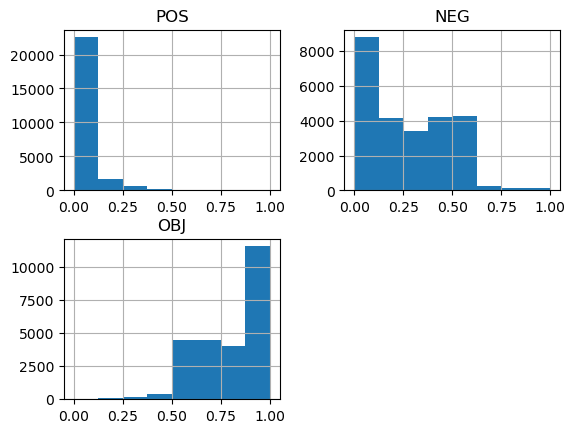

In [60]:
sent_an.hist(bins=8)

<Axes: >

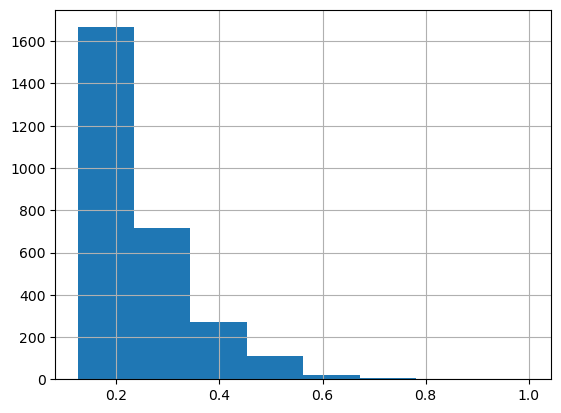

In [61]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<Axes: >

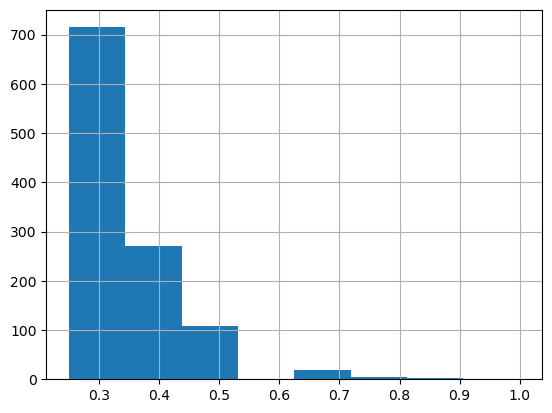

In [62]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<Axes: >

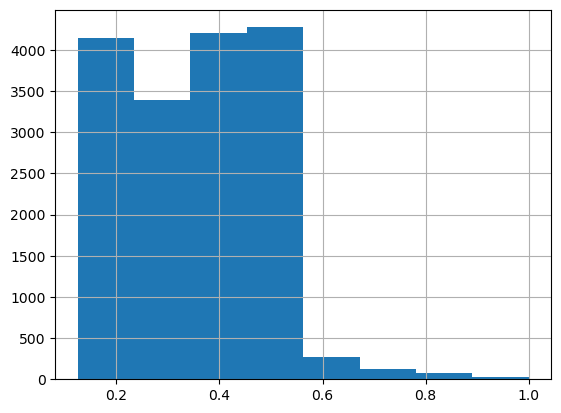

In [63]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<Axes: >

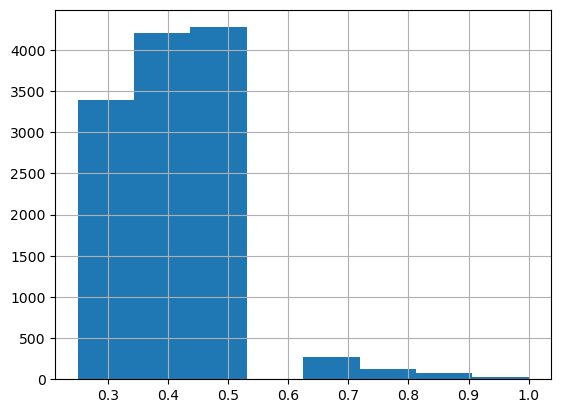

In [64]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [65]:
sent_an["Vrsta"].value_counts(sort=True)

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: ylabel='count'>

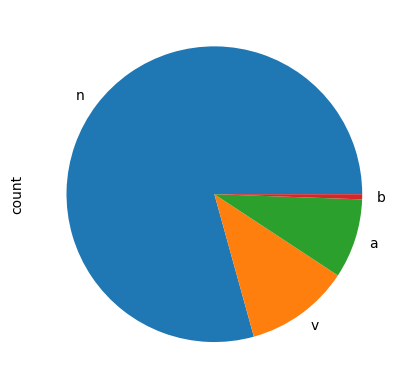

In [66]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

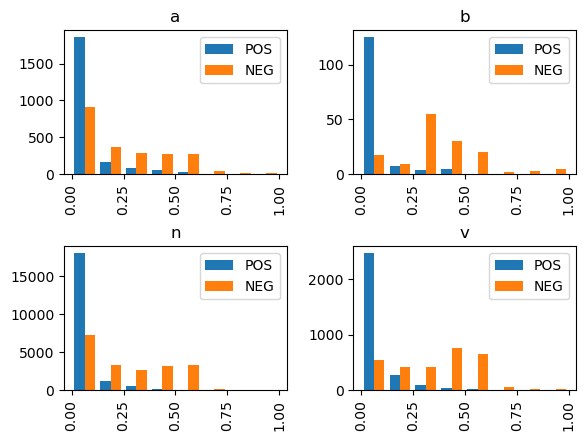

In [67]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

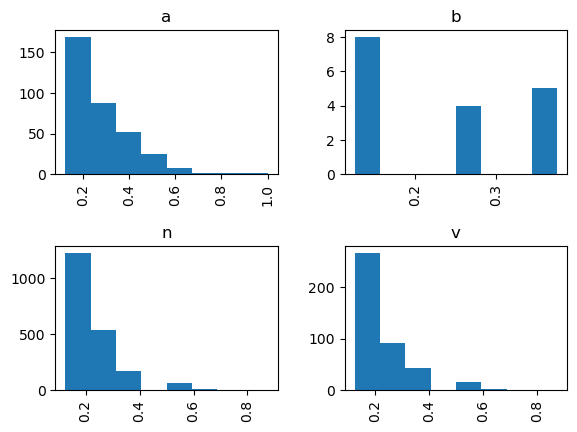

In [68]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

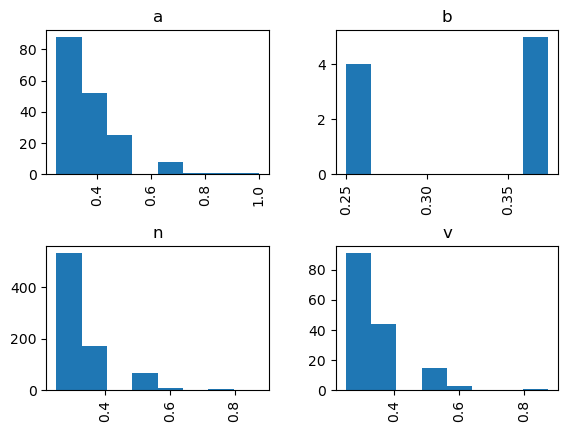

In [69]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

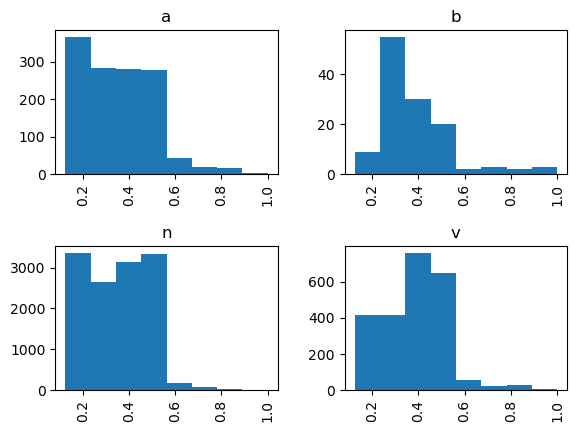

In [70]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

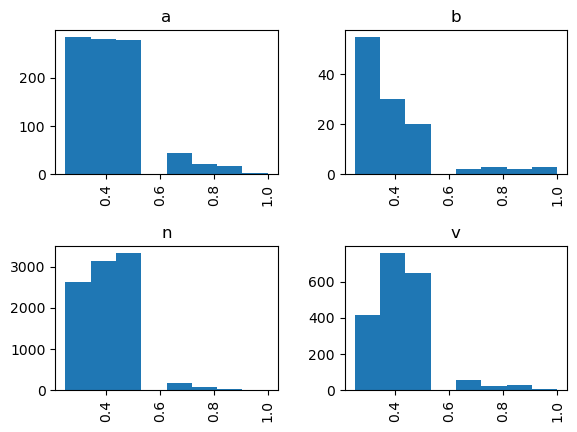

In [71]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

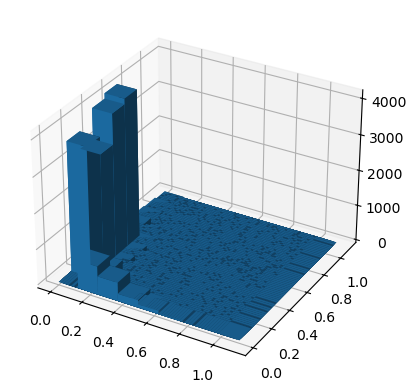

In [72]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<Axes: ylabel='count'>

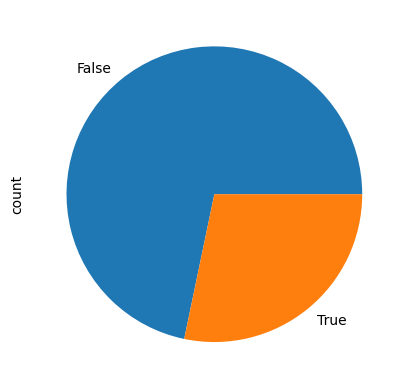

In [73]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

<Axes: xlabel='NEG'>

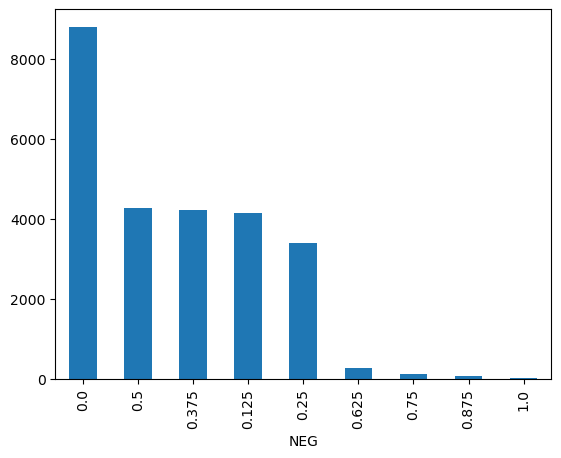

In [74]:
sent_an["NEG"].value_counts().plot(kind = "bar")

<Axes: xlabel='POS'>

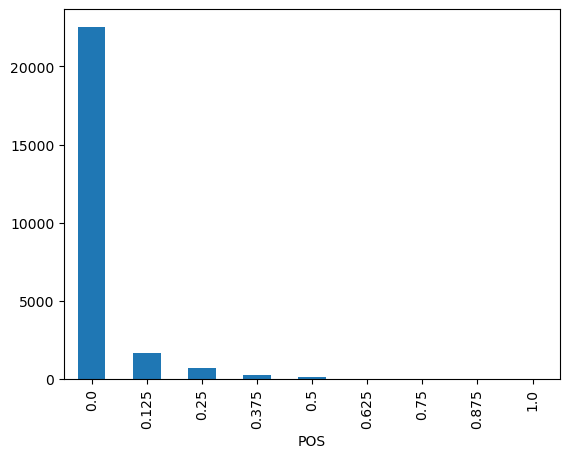

In [75]:
sent_an["POS"].value_counts().plot(kind = "bar")

In [76]:
a = sent_an[["POS","NEG"]].value_counts(sort=True)

<Axes: ylabel='count'>

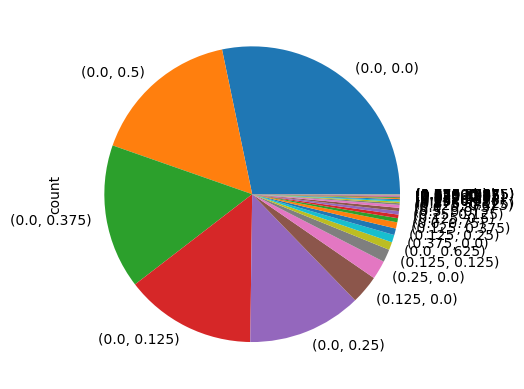

In [77]:
a.plot(kind ="pie")

In [78]:
sent_an["Vrsta"].value_counts()

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: title={'center': 'imenice-negativno'}, xlabel='NEG'>

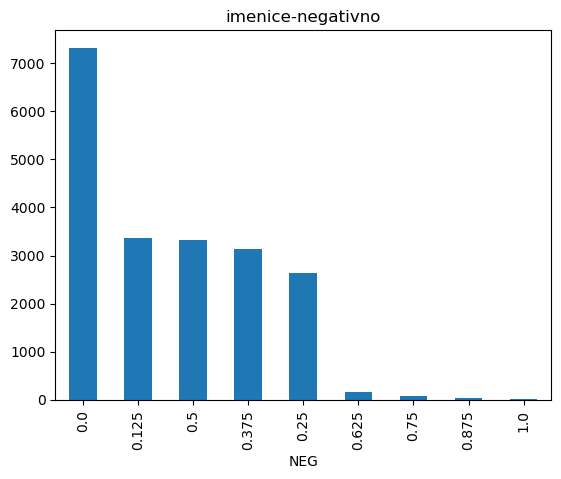

In [79]:
sent_an[sent_an["Vrsta"] == 'n']["NEG"].value_counts().plot(kind = "bar", title = "imenice-negativno")

<Axes: title={'center': 'imenica-positivno'}, xlabel='POS'>

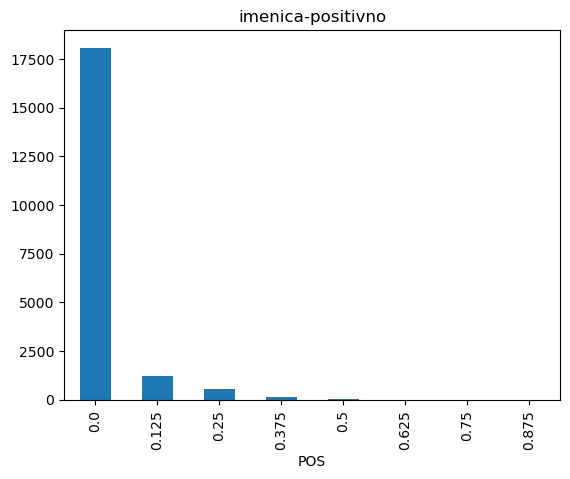

In [80]:
sent_an[sent_an["Vrsta"] == 'n']["POS"].value_counts().plot(kind = "bar", title = "imenica-positivno")

<Axes: title={'center': 'glagol-negativno'}, xlabel='NEG'>

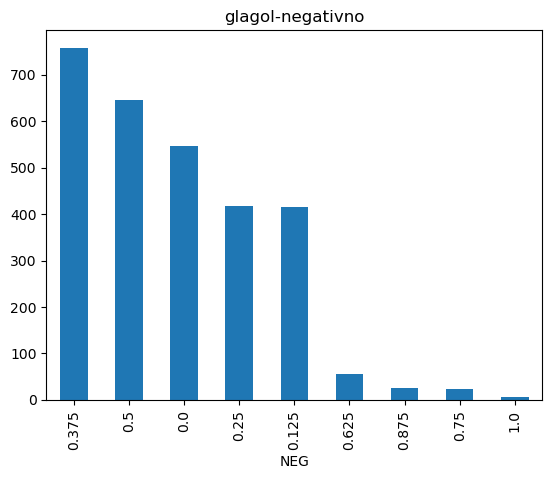

In [81]:
sent_an[sent_an["Vrsta"] == 'v']["NEG"].value_counts().plot(kind = "bar", title = "glagol-negativno")

<Axes: title={'center': 'glagol-positivno'}, xlabel='POS'>

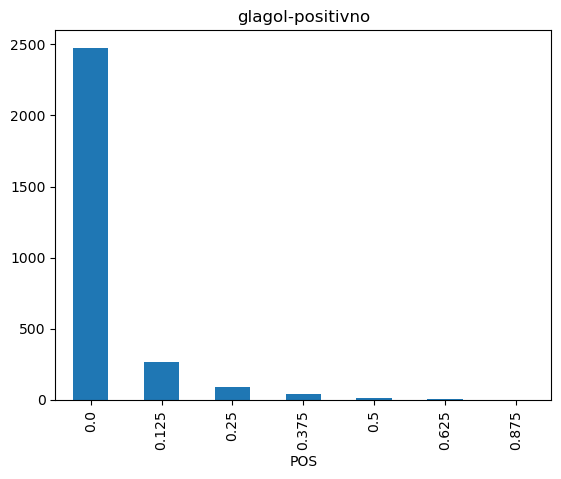

In [82]:
sent_an[sent_an["Vrsta"] == 'v']["POS"].value_counts().plot(kind = "bar", title = "glagol-positivno")

<Axes: title={'center': 'pridev-negativno'}, xlabel='NEG'>

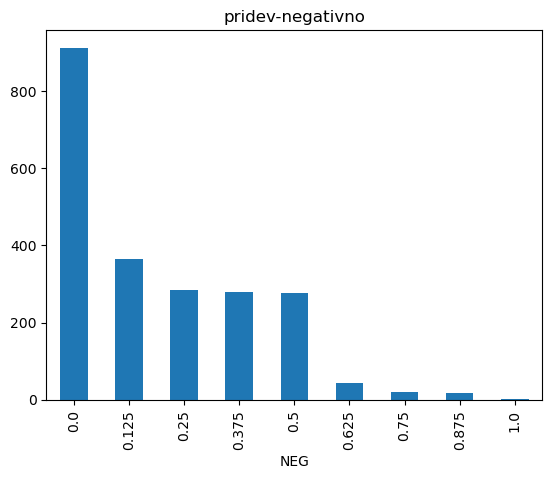

In [83]:
sent_an[sent_an["Vrsta"] == 'a']["NEG"].value_counts().plot(kind = "bar", title = "pridev-negativno")

<Axes: title={'center': 'pridev-positivno'}, xlabel='POS'>

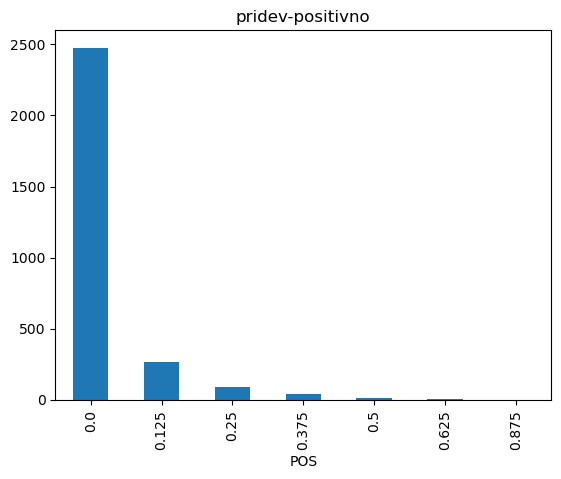

In [84]:
sent_an[sent_an["Vrsta"] == 'v']["POS"].value_counts().plot(kind = "bar", title = "pridev-positivno")

KeyError: 0

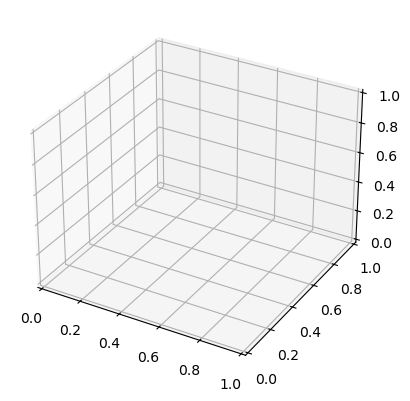

In [85]:

fig = plt.figure()
b =pd.DataFrame(a).reset_index()
ax = plt.axes(projection ='3d')
ax.scatter(b["POS"],b["NEG"],b[0], color ='green')


In [ ]:
a = sent_an[["POS","NEG", "Vrsta"]].value_counts(sort=True)
a

In [ ]:
fig = plt.figure()
c =pd.DataFrame(a).reset_index()
ax = plt.axes(projection ='3d')

b =c [c["Vrsta"]=="n"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='green')
b =c [c["Vrsta"]=="v"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='blue')
b =c [c["Vrsta"]=="a"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='red')



In [ ]:
# srbsentiwordnet2.cvs
# srbsentiwordnet_a2.cvs